In [61]:
import pandas as pd

# Load the uploaded dataset
file_path = "creditcard_fault.csv"
df = pd.read_csv(file_path)
df

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,26452,F,N,N,2,225000.0,State servant,Secondary / secondary special,Married,House / apartment,-12079,-1984,1,0,0,0,Core staff,4.0,-2.0,1.0
26453,26453,F,N,Y,1,180000.0,Working,Higher education,Separated,House / apartment,-15291,-2475,1,0,0,0,NaN,2.0,-47.0,2.0
26454,26454,F,Y,N,0,292500.0,Working,Secondary / secondary special,Civil marriage,With parents,-10082,-2015,1,0,0,0,Core staff,2.0,-25.0,2.0
26455,26455,M,N,Y,0,171000.0,Working,Incomplete higher,Single / not married,House / apartment,-10145,-107,1,0,0,0,Laborers,1.0,-59.0,2.0


### 1. 기본 정보를 확인하고 변수의 의미와 데이터 타입 파악하기 
변수의 의미를 알고있을 경우에는 데이터 분석에 불필요한 특성을 보고 제외할 수 있음   
Q: 데이터 기본정보를 살펴보고 불필요 변수를 파악하고 제거하세요.

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  occyp_type     18286 non-null  object 
 17  family_size    26457 non-null  float64
 18  begin_

Feature 삭제 코드 작성하기

In [63]:
df.drop('index', axis=1, inplace=True)

### 2. 결측치 처리
Q: 결측치 여부를 판단하고 결측치를 처리하세요.

In [64]:
missing_ratio = df.isnull().sum() / len(df) * 100
print(missing_ratio)

gender            0.000000
car               0.000000
reality           0.000000
child_num         0.000000
income_total      0.000000
income_type       0.000000
edu_type          0.000000
family_type       0.000000
house_type        0.000000
DAYS_BIRTH        0.000000
DAYS_EMPLOYED     0.000000
FLAG_MOBIL        0.000000
work_phone        0.000000
phone             0.000000
email             0.000000
occyp_type       30.884076
family_size       0.000000
begin_month       0.000000
credit            0.000000
dtype: float64


결측치 처리 코드 작성하기

In [65]:
df['occyp_type'].fillna('Unknown', inplace=True)
df.isnull().sum()

C:\Users\Noh\AppData\Local\Temp\ipykernel_31128\2418029560.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['occyp_type'].fillna('Unknown', inplace=True)


gender           0
car              0
reality          0
child_num        0
income_total     0
income_type      0
edu_type         0
family_type      0
house_type       0
DAYS_BIRTH       0
DAYS_EMPLOYED    0
FLAG_MOBIL       0
work_phone       0
phone            0
email            0
occyp_type       0
family_size      0
begin_month      0
credit           0
dtype: int64

### 3. 수치형 변수 처리
Q1: 이상치 감지 및 제거 (자유롭게 판단)   
Q2: 어떤 특성은 다른 데이터와 특별히 다른 분포를 갖습니다. 적절히 처리해보세요.

In [66]:
import matplotlib.pyplot as plt

# 수치형 변수 찾기
numeric_columns = df.select_dtypes(include=['number']).columns
print(numeric_columns)

Index(['child_num', 'income_total', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'FLAG_MOBIL', 'work_phone', 'phone', 'email', 'family_size',
       'begin_month', 'credit'],
      dtype='object')


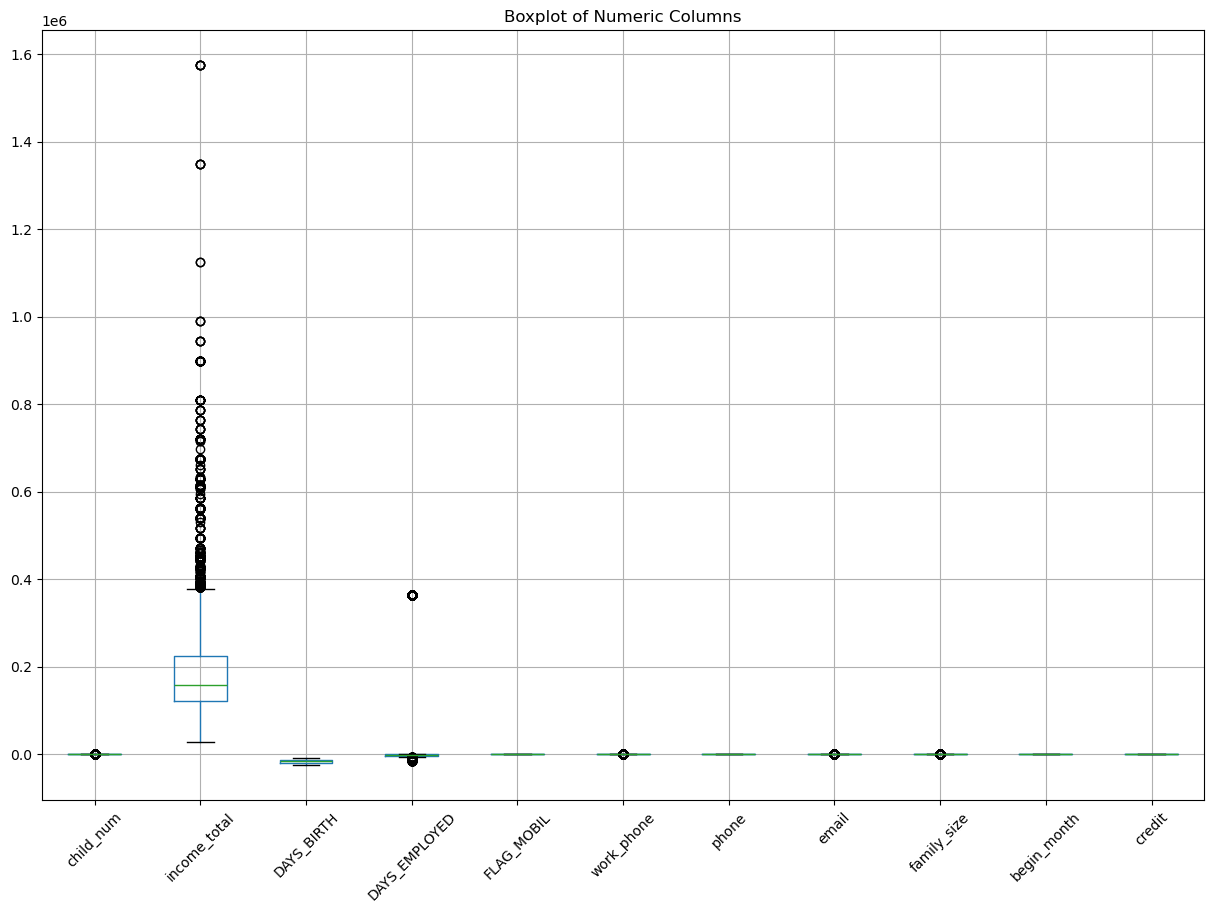

In [67]:
plt.figure(figsize=(15, 10))
df[numeric_columns].boxplot()
plt.title('Boxplot of Numeric Columns')
plt.xticks(rotation=45)
plt.show()

Q1 문제 해결 코드 작성하기

In [ ]:
print(df['DAYS_EMPLOYED'].value_counts())

df['DAYS_EMPLOYED'].replace(365243, 0, inplace=True)

print(df['DAYS_EMPLOYED'].value_counts())

DAYS_EMPLOYED
 365243    4438
-401         57
-1539        47
-200         45
-2087        44
           ... 
-10475        1
-2202         1
-2552         1
-680          1
-4973         1
Name: count, Length: 3470, dtype: int64
DAYS_EMPLOYED
 0        4438
-401        57
-1539       47
-200        45
-2087       44
          ... 
-10475       1
-2202        1
-2552        1
-680         1
-4973        1
Name: count, Length: 3470, dtype: int64
None


C:\Users\Noh\AppData\Local\Temp\ipykernel_31128\652100929.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['DAYS_EMPLOYED'].replace(365243, 0, inplace=True)


Q2 문제 해결 코드 작성하기

In [71]:
income_max = df['income_total'].max()
income_min = df['income_total'].min()

income_norm = df['income_total'].apply(lambda x: (x - income_min) / (income_max - income_min))
df['income_total'] = income_norm
df['income_total']

0        0.113372
1        0.142442
2        0.273256
3        0.113372
4        0.084302
           ...   
26452    0.127907
26453    0.098837
26454    0.171512
26455    0.093023
26456    0.034884
Name: income_total, Length: 26457, dtype: float64

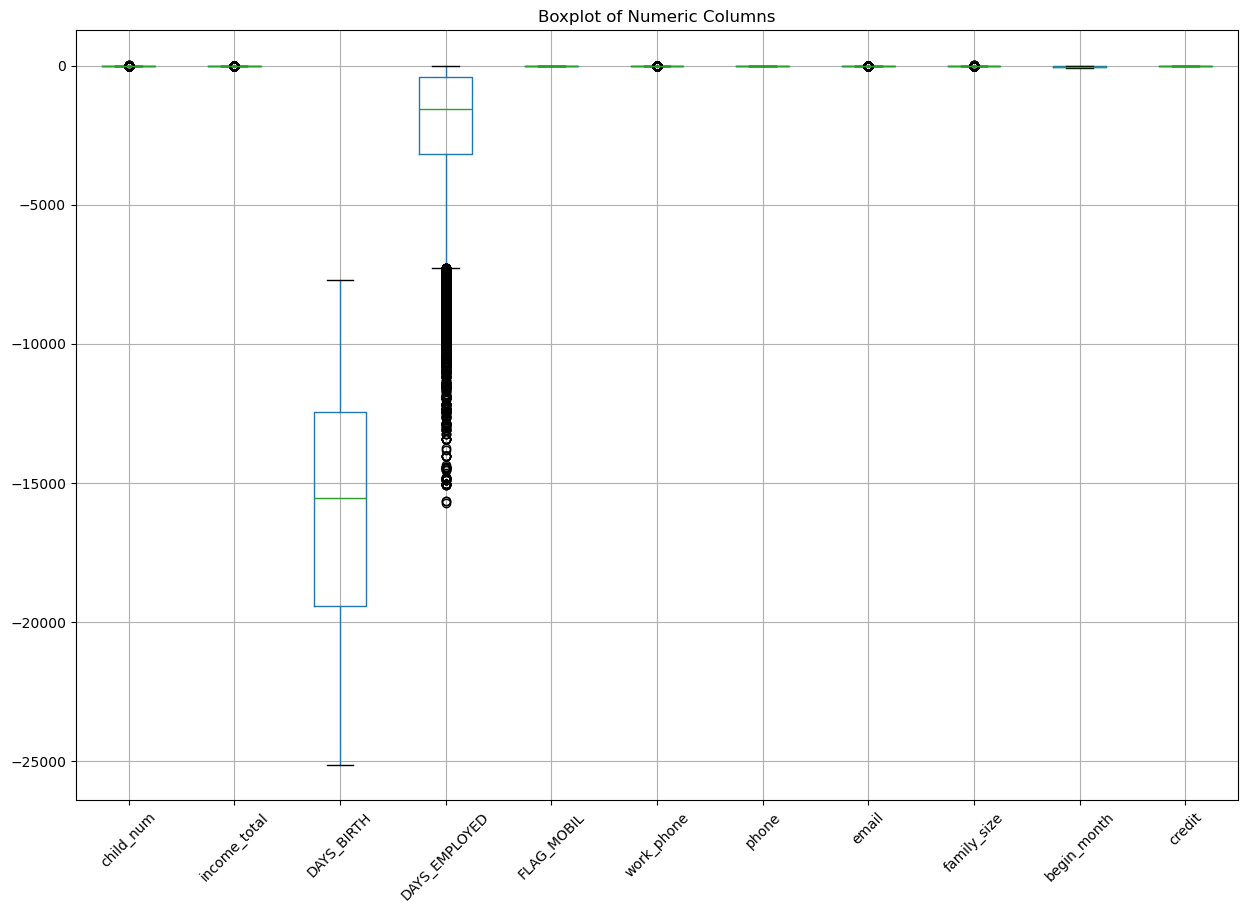

In [72]:
plt.figure(figsize=(15, 10))
df[numeric_columns].boxplot()
plt.title('Boxplot of Numeric Columns')
plt.xticks(rotation=45)
plt.show()

### 4. 날짜와 시간에 관련된 특성 처리
Q: 날짜와 시간과 관련한 데이터를 찾고 적절한 조치를 취하세요.   
예) 일 수 -> 년   (이렇게하면 어떤 이득이 있는지 생각해보세요.)

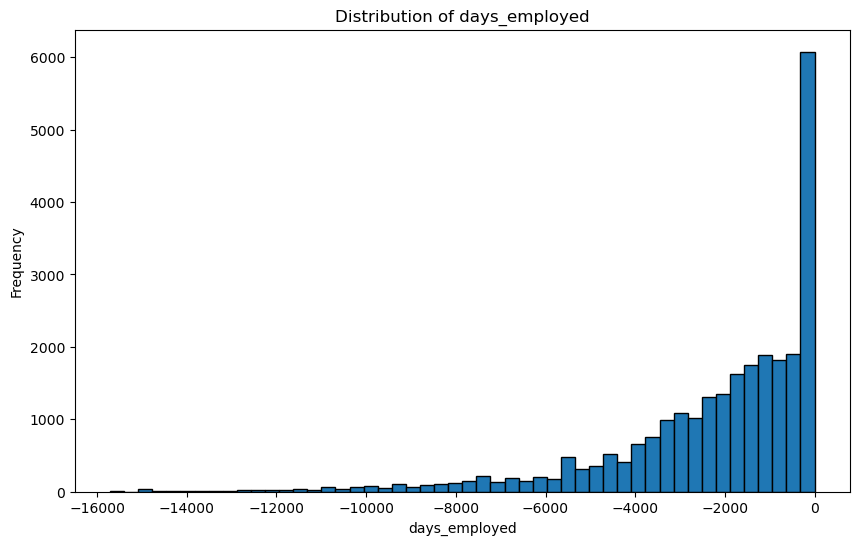

In [73]:
import matplotlib.pyplot as plt

# days_employed 변수의 분포를 시각화
plt.figure(figsize=(10, 6))
plt.hist(df['DAYS_EMPLOYED'], bins=50, edgecolor='k')
plt.title('Distribution of days_employed')
plt.xlabel('days_employed')
plt.ylabel('Frequency')
plt.show()

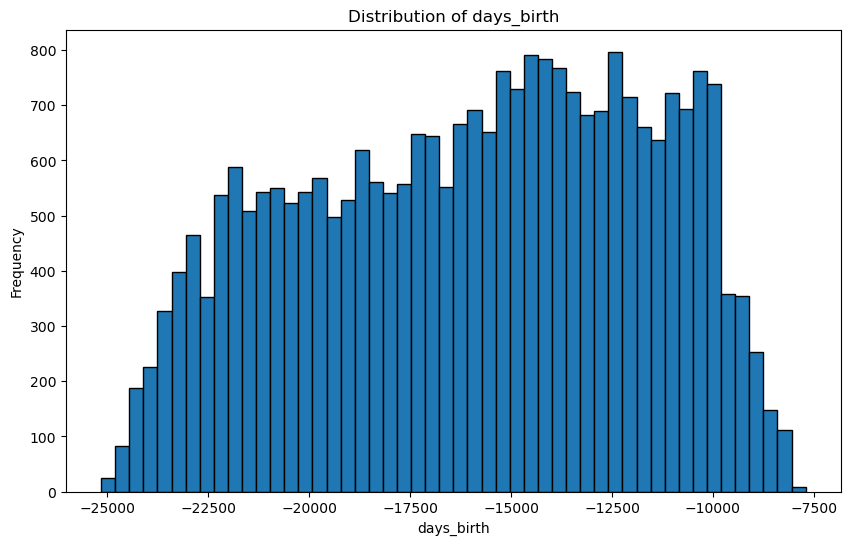

In [74]:
# days_birth 변수의 분포를 시각화
plt.figure(figsize=(10, 6))
plt.hist(df['DAYS_BIRTH'], bins=50, edgecolor='k')
plt.title('Distribution of days_birth')
plt.xlabel('days_birth')
plt.ylabel('Frequency')
plt.show()

날짜/시간 과 관련된 변수에 대한 처리를 하고 아래 그림과 같은 결과가 나오도록 시각화 하세요.

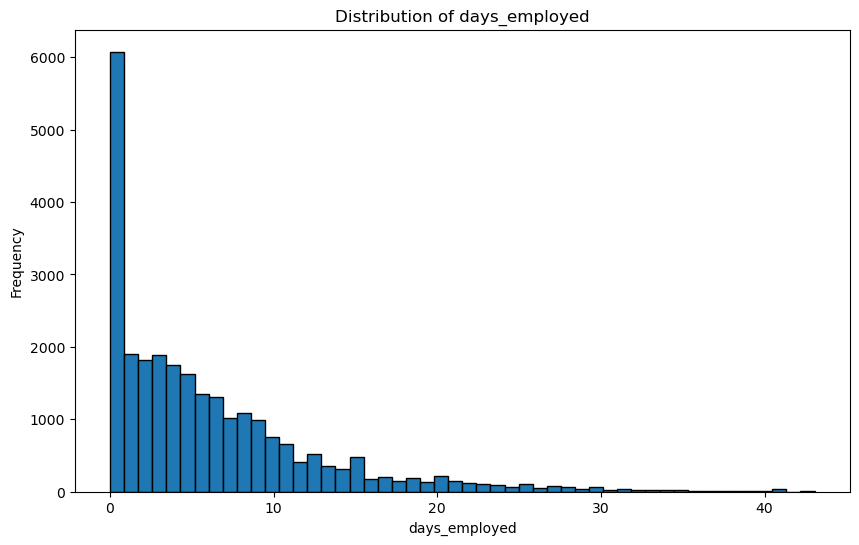

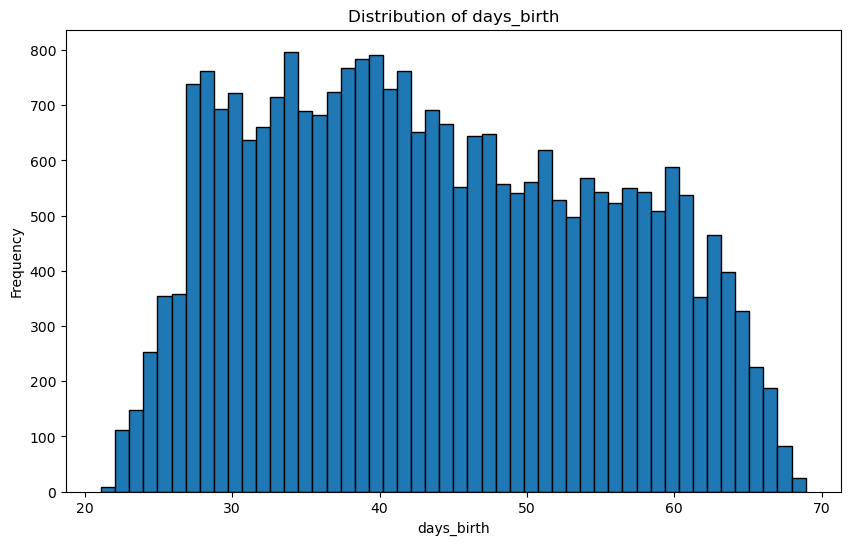

In [84]:
df['DAYS_EMPLOYED'] = (-1) * (df['DAYS_EMPLOYED'] / 365)
df['DAYS_BIRTH'] = (-1) * (df['DAYS_BIRTH'] / 365)

# days_employed 변수의 분포를 시각화
plt.figure(figsize=(10, 6))
plt.hist(df['DAYS_EMPLOYED'], bins=50, edgecolor='k')
plt.title('Distribution of days_employed')
plt.xlabel('days_employed')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(df['DAYS_BIRTH'], bins=50, edgecolor='k')
plt.title('Distribution of days_birth')
plt.xlabel('days_birth')
plt.ylabel('Frequency')
plt.show()

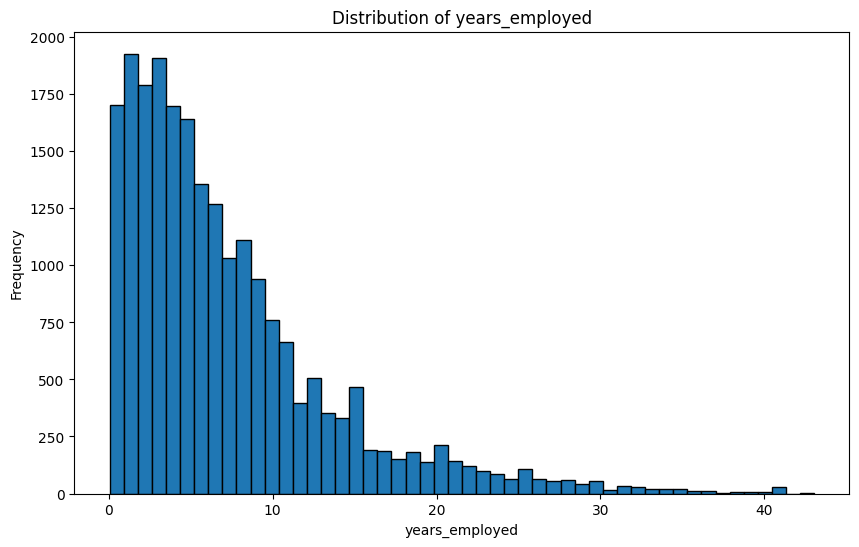

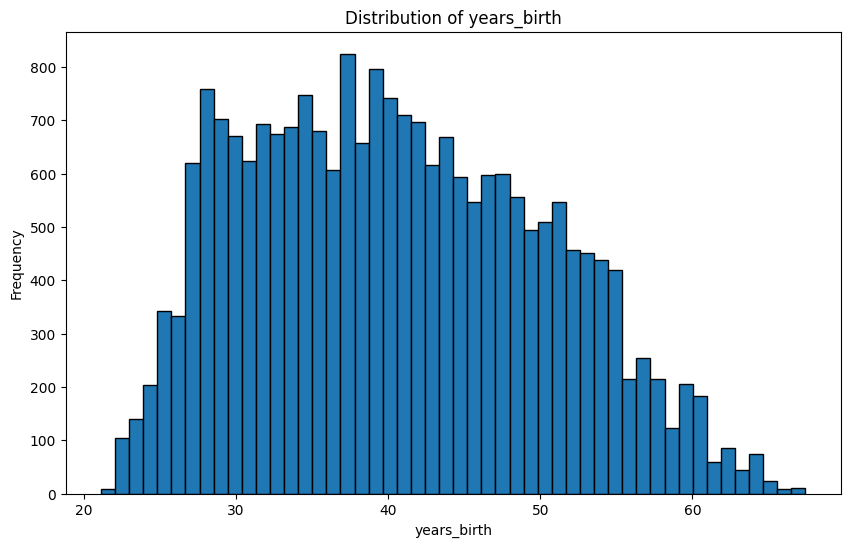

In [13]:
# 코드 작성

### 5. 범주형 데이터 처리
범주형데이터를 숫자형태로 처리하기 위해 대표적인 방식은 one-hot encoding, Labeling 이 있습니다.   
Q: from sklearn.preprocessing import LabelEncoder 의 사용법을 숙지하고 범주형 데이터를 labeling 형식으로 바꾸세요.

In [85]:
from sklearn.preprocessing import LabelEncoder

# 코드 작성
le = LabelEncoder()
# 범주형 변수 인코딩
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])
# 인코딩된 데이터 확인
df.head()

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,0,0,0,0.113372,0,1,1,2,38.079452,12.901370,1,0,0,0,17,2.0,-6.0,1.0
1,0,0,1,1,0.142442,0,4,0,1,31.178082,4.219178,1,0,0,1,8,3.0,-5.0,1.0
2,1,1,1,0,0.273256,4,1,1,1,52.293151,12.147945,1,0,1,0,10,2.0,-22.0,2.0
3,0,0,1,0,0.113372,0,4,1,1,41.336986,5.731507,1,0,1,0,14,2.0,-37.0,0.0
4,0,1,1,0,0.084302,2,1,1,1,41.197260,5.767123,1,0,0,0,10,2.0,-26.0,2.0


In [14]:
# 결과 확인
df.head()

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,YEARS_BIRTH,YEARS_EMPLOYED,FLAG_MOBIL,work_phone,phone,occyp_type,family_size,begin_month,credit
0,0,0,0,0,12.218500,0,1,1,2,38.079452,12.901370,1,0,0,18,2.0,-6.0,1.0
1,0,0,1,1,12.419170,0,4,0,1,31.178082,4.219178,1,0,0,8,3.0,-5.0,1.0
2,1,1,1,0,13.017005,4,1,1,1,52.293151,12.147945,1,0,1,10,2.0,-22.0,2.0
3,0,0,1,0,12.218500,0,4,1,1,41.336986,5.731507,1,0,1,14,2.0,-37.0,0.0
4,0,1,1,0,11.967187,2,1,1,1,41.197260,5.767123,1,0,0,10,2.0,-26.0,2.0


# EDA 진행하기

### 1. 수치형 변수 분석하기
Q: 나이, 경력, 소득, 가족수, 카드발급 일 수 에 따른 데이터 특성을 시각화하고 분석하세요. (결과를 해석해보세요.)

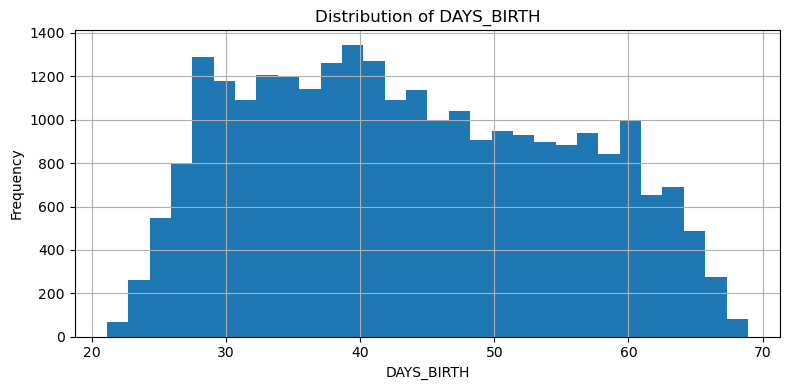

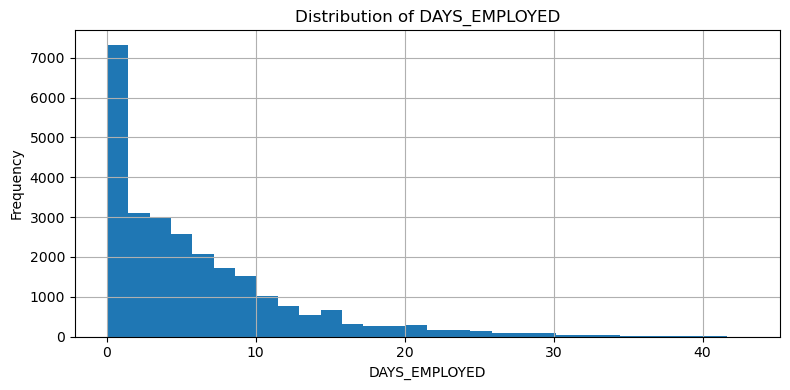

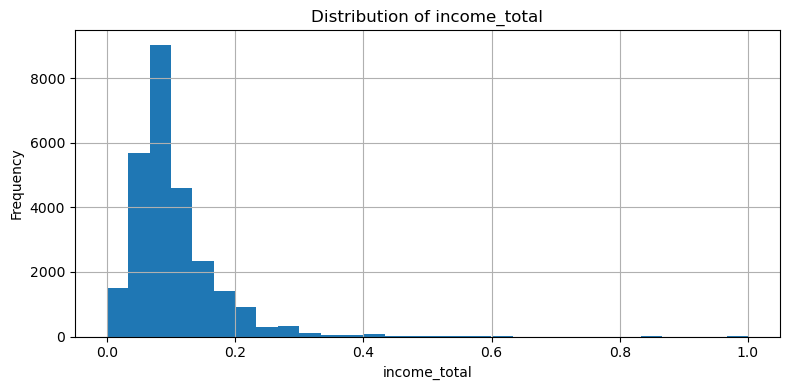

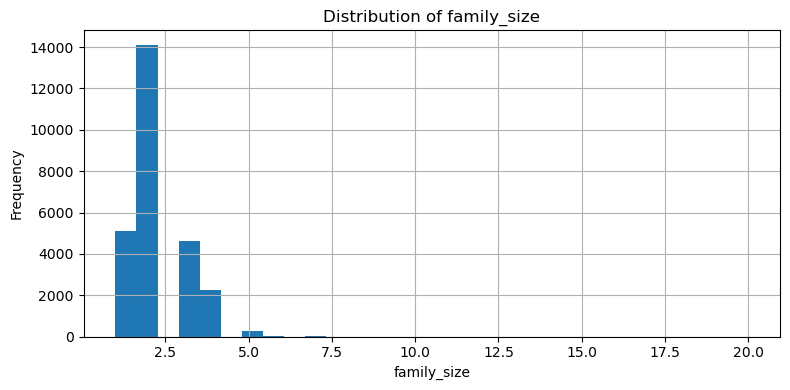

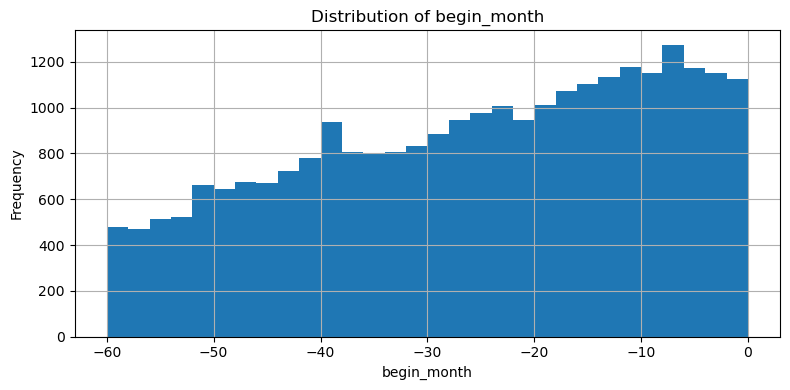

In [87]:
for col in ['DAYS_BIRTH', 'DAYS_EMPLOYED', 'income_total', 'family_size', 'begin_month']:
    plt.figure(figsize=(8, 4))
    df[col].hist(bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

Q2: 수치형 변수들 간에 상관관계 분석을 실행하세요.   
다중공선성을 제거하세요.

In [ ]:
# 코드 작성하기

In [17]:
# 다중공선성 제거 코드 작성

### 2. 범주형 데이터 분석 하기
Q: 아래 코드를 실행하고 결과를 분석하세요.

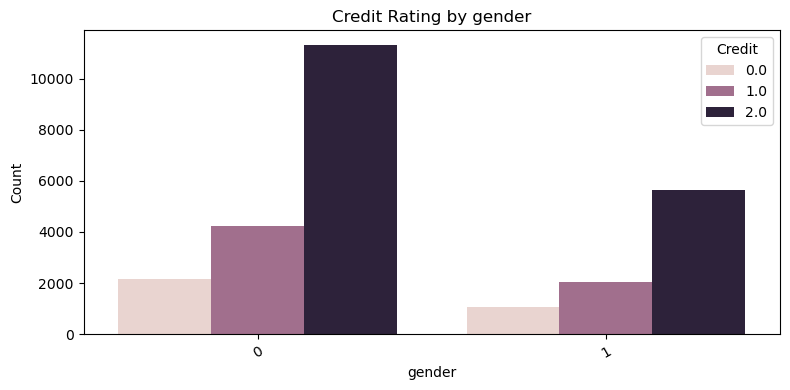

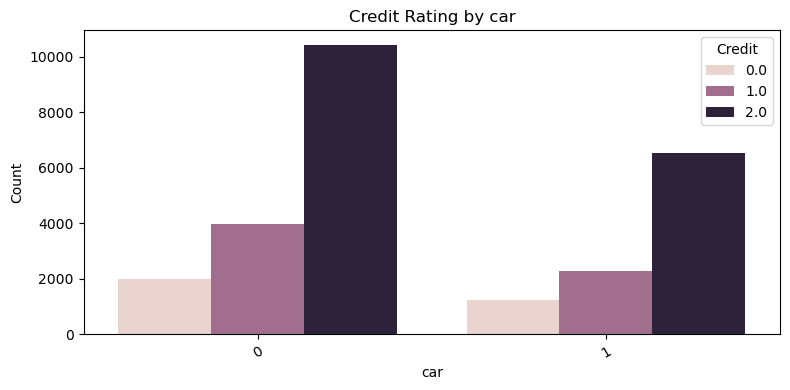

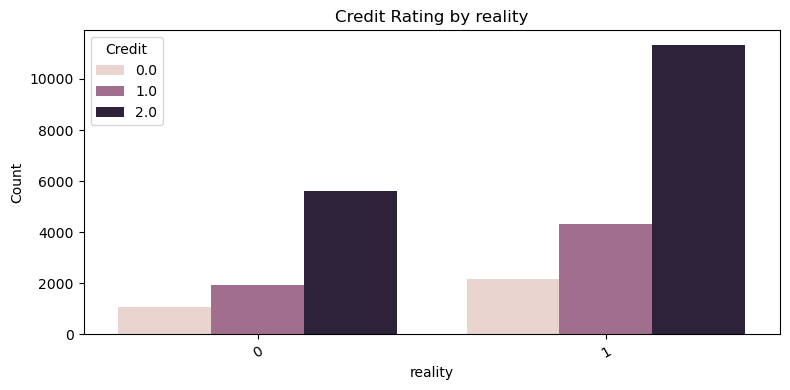

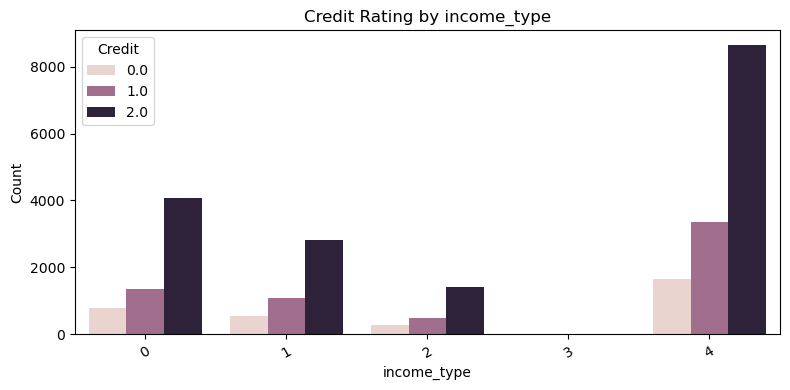

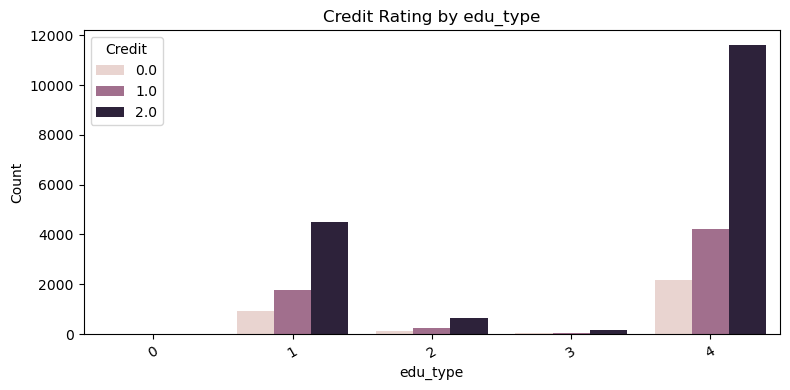

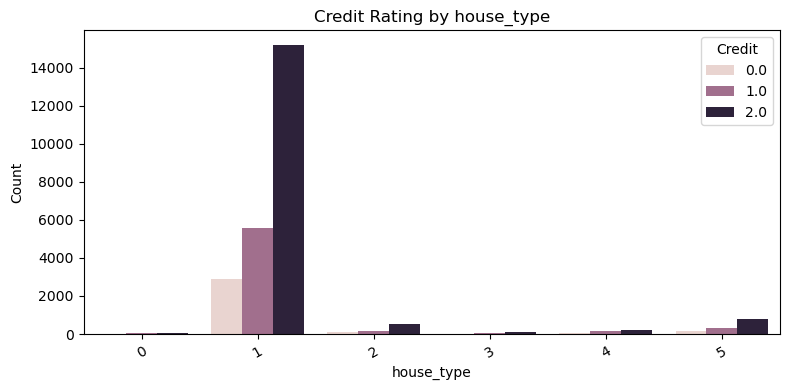

In [88]:
import seaborn as sns

categorical_cols = ['gender', 'car', 'reality', 'income_type', 'edu_type', 'house_type']

for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, hue='credit', data=df)
    plt.title(f'Credit Rating by {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=30)
    plt.legend(title='Credit')
    plt.tight_layout()
    plt.show()


# 모델 학습하기

#### 모델 추천

0. 베이스 라인(로지스틱회귀)

1. 랜덤 포레스트   
&emsp;- 범주형/수치형 변수 모두 잘 처리   
&emsp;- 결측치 약간 있어도 견고함

2. XGBoost   
&emsp;- 클래스 불균형에 강하고, 하이퍼파라미터 튜닝시 매우 강력함 (튜닝 필요)

Q: 데이터를 학습|테스트셋으로 8:2 비율로 나누는 코드를 작성하세요. (random_state=42 설정, stratiry=y 설정)

In [89]:
from sklearn.model_selection import train_test_split

X = df.drop('credit', axis=1)
y = df['credit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Q: Logistic Regression, RandomFrestClassifier, XGBClassifier 모델에 대해 학습하고 평가하세요.   
평가는 다음 라이브러리를 사용하세요: from sklearn.metrics import accuracy_score, classification_report 

In [93]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

rfc_model = RandomForestClassifier(random_state=42)
reg_model = LogisticRegression(random_state=42)
xgb_model = XGBClassifier(random_state=42)

rfc_model.fit(X_train, y_train)
reg_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

rfc_pred = rfc_model.predict(X_test)
reg_pred = reg_model.predict(X_test)
xgb_pred = xgb_model.predict(X_test)

print("Random Forest Classifier Accuracy:", accuracy_score(y_test, rfc_pred))
print("Logistic Regression Accuracy:", accuracy_score(y_test, reg_pred))
print("XGBoost Classifier Accuracy:", accuracy_score(y_test, xgb_pred))

c:\Users\Noh\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Random Forest Classifier Accuracy: 0.70427059712774
Logistic Regression Accuracy: 0.6394557823129252
XGBoost Classifier Accuracy: 0.7091836734693877


Q: 가장 성능이 좋은 모델을 선정하고 feature importance를 시각화하세요.

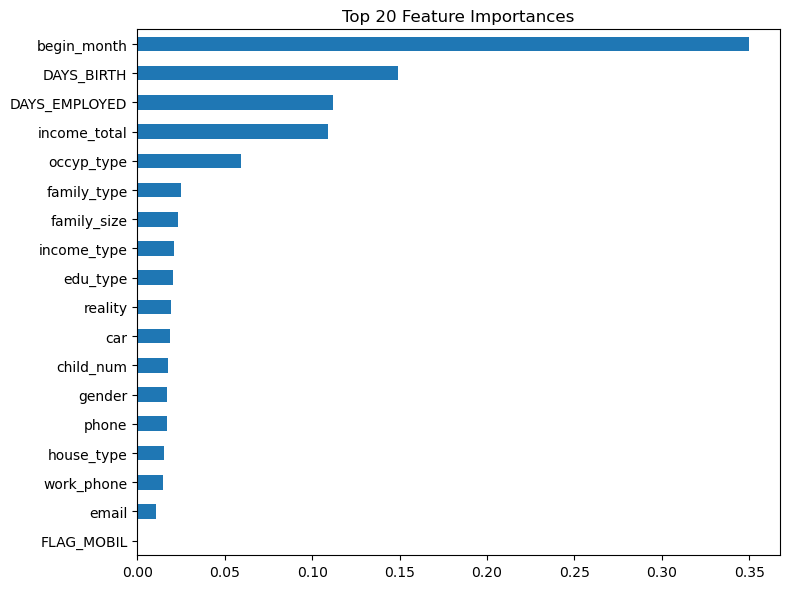

In [96]:
# Feature Importance 시각화
importances = pd.Series(rfc_model.feature_importances_, index=X.columns)
importances.sort_values(ascending=True).tail(20).plot(kind='barh', figsize=(8, 6), title="Top 20 Feature Importances")
plt.tight_layout()
plt.show()

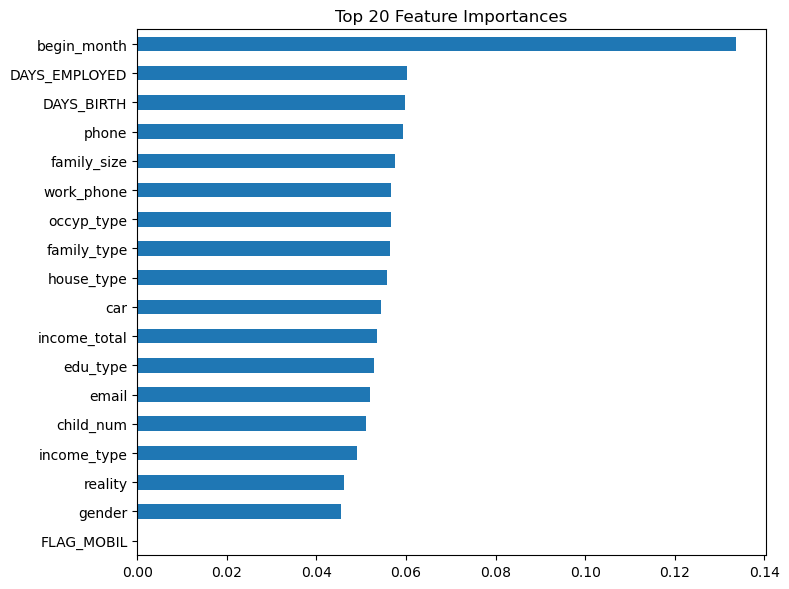

In [97]:
# Feature Importance 시각화
importances = pd.Series(xgb_model.feature_importances_, index=X.columns)
importances.sort_values(ascending=True).tail(20).plot(kind='barh', figsize=(8, 6), title="Top 20 Feature Importances")
plt.tight_layout()
plt.show()

Q: 모델의 성능을 높이기 위한 조치를 생각해보고 성능을 높여보세요. 